Generate synthetic kyb data with business name, registration status, financial health status, compliance status and operation status

In [7]:
import random

# Defining the parameters for synthetic KYB documents
business_names = [f"Biz{i}" for i in range(1, 11)]
registration_statuses = ["Registered", "Pending", "Not Registered"]
financial_health_statuses = ["Stable", "At Risk", "Growing"]
compliance_statuses = ["Compliant", "Minor Issues", "Major Issues"]
operational_activities = ["Active", "Limited Activity", "Dormant"]

# Generating synthetic KYB documents
synthetic_kyb_documents = []

for name in business_names:
    document = {
        "Business Name": name,
        "Registration Status": random.choice(registration_statuses),
        "Financial Health": random.choice(financial_health_statuses),
        "Compliance Status": random.choice(compliance_statuses),
        "Operational Activity": random.choice(operational_activities)
    }
    synthetic_kyb_documents.append(document)
from sklearn.preprocessing import LabelEncoder

# Initializing label encoders for categorical features
le_registration = LabelEncoder()
le_financial = LabelEncoder()
le_compliance = LabelEncoder()
le_operational = LabelEncoder()

# Extracting the feature columns for encoding
registration_status = [doc['Registration Status'] for doc in synthetic_kyb_documents]
financial_health = [doc['Financial Health'] for doc in synthetic_kyb_documents]
compliance_status = [doc['Compliance Status'] for doc in synthetic_kyb_documents]
operational_activity = [doc['Operational Activity'] for doc in synthetic_kyb_documents]

# Encoding the features
encoded_registration_status = le_registration.fit_transform(registration_status)
encoded_financial_health = le_financial.fit_transform(financial_health)
encoded_compliance_status = le_compliance.fit_transform(compliance_status)
encoded_operational_activity = le_operational.fit_transform(operational_activity)

# Creating a dataset for clustering
cluster_data = list(zip(encoded_registration_status, encoded_financial_health, 
                        encoded_compliance_status, encoded_operational_activity))

Cluster 10 businesses using Hierarchical Clustering

Performing Hierarchical Clustering


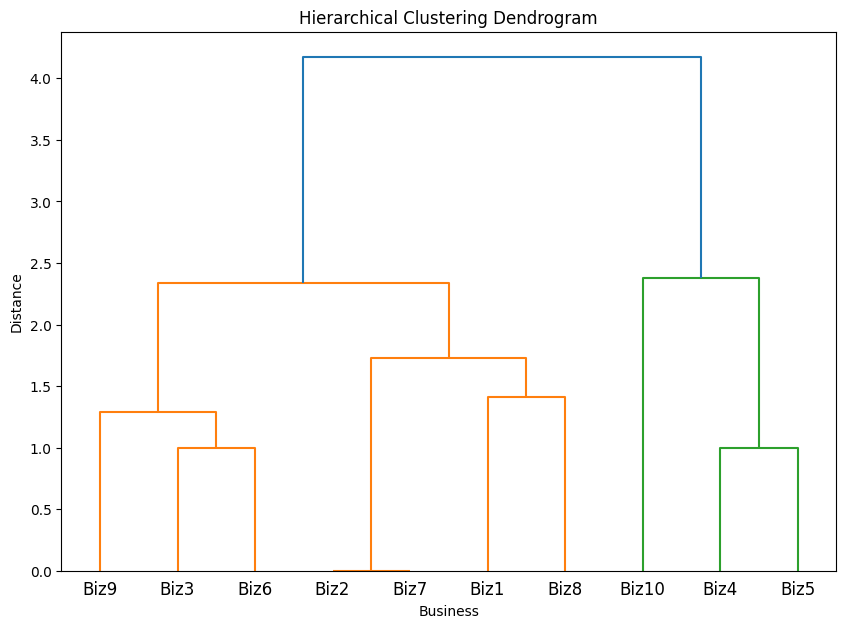

In [8]:
#h_cluster
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Performing Hierarchical Clustering
print("Performing Hierarchical Clustering")
linkage_matrix = linkage(cluster_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=business_names)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Business")
plt.ylabel("Distance")
plt.show()

Cluster the 10 businesses using K-Means Clustering 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# Applying K-Means clustering
print("Performing K-Means clustering")
num_clusters = 3  # Adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(cluster_data)

# Adding cluster labels to the synthetic KYB documents
for i, doc in enumerate(synthetic_kyb_documents):
    doc["Cluster Label"] = kmeans.labels_[i]

# Print the documents and their associated cluster labels
for doc in synthetic_kyb_documents:
    print(f"Business Name: {doc['Business Name']}, Cluster Label: {doc['Cluster Label']}")


Performing K-Means clustering
Business Name: Biz1, Cluster Label: 0
Business Name: Biz2, Cluster Label: 0
Business Name: Biz3, Cluster Label: 0
Business Name: Biz4, Cluster Label: 2
Business Name: Biz5, Cluster Label: 2
Business Name: Biz6, Cluster Label: 0
Business Name: Biz7, Cluster Label: 0
Business Name: Biz8, Cluster Label: 0
Business Name: Biz9, Cluster Label: 0
Business Name: Biz10, Cluster Label: 1


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Using Hierarchical Clustering, these are the results
- Biz1, Biz4 = Cluster 1
- Biz2, Biz8 = Cluster 2
- Biz3, Biz5, Biz9 = Cluster 3
- Biz6, Biz7, Biz10 = Cluster 4


Using KMeans Clustering, these are the results
- Biz1, Biz2, Biz8 = Cluster 1
- Biz3, Biz5, Biz9 = Cluster 2
- Biz4, Biz6, Biz7, Biz10 = Cluster 3

Cluster the 10 businesses using DBSCAN

Performing DBSCAN


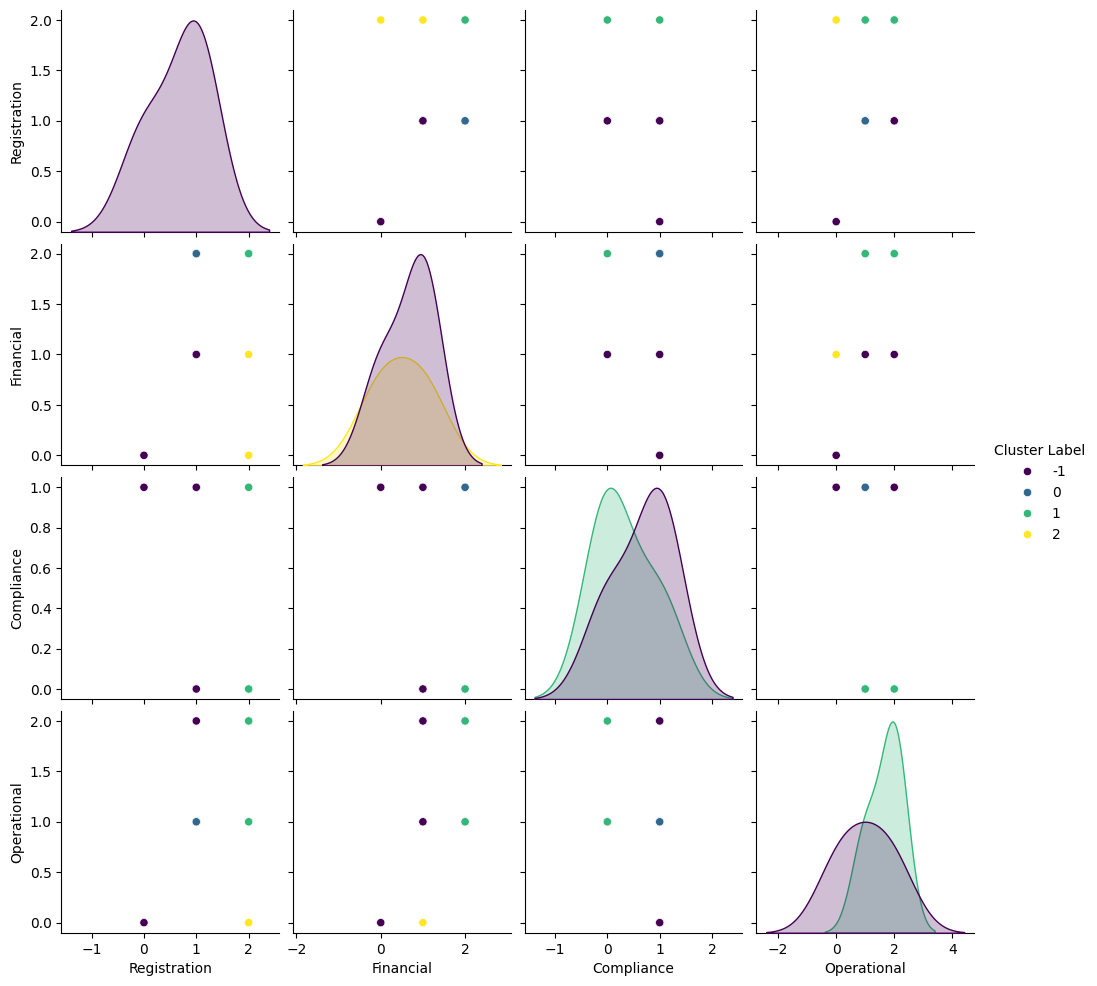

In [10]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Running DBSCAN clustering
print("Performing DBSCAN")
dbscan = DBSCAN(eps=1, min_samples=2)  # Adjust parameters based on your specific needs
cluster_labels = dbscan.fit_predict(cluster_data)

# Adding cluster labels to the synthetic KYB documents
for i, doc in enumerate(synthetic_kyb_documents):
    doc["Cluster Label"] = cluster_labels[i]

# Visualizing the clusters
cluster_df = pd.DataFrame(cluster_data, columns=["Registration", "Financial", "Compliance", "Operational"])
cluster_df["Cluster Label"] = cluster_labels

sns.pairplot(cluster_df, hue="Cluster Label", palette="viridis")
plt.show()
